In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
Jupyter=True, MatPlotLib.isinteractive()=False
Unique ID: 2RDnOihcRoCDmuhN80CShA
PlotVideoMaker: Hyper-Training, auto-save=True
middle-C=261.63 Hz
PlotVideoMaker: STFT_Video, auto-save=True
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1024 samples, duration=2.0 sec = 86 time steps
Max frequency=22050 Hz --> freq_buckets=1025
STFT file already created: STFT 44100 Hz, size=1024, hop=1024.pkl
1 sample = 1,025 x 86 = 88,150


In [3]:
# Read all available samples and convert to STFTs
# This is performed automatically in the back-ground, but you can force it manually here with plots of the rejected audio files.
#make_STFTs(True)

#test_stft_conversions("Samples/Piano C4 Major 13 - 44.1 kHz.wav")
#stop()

In [4]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"
#model = "RNN_VAE"
#model = "RNN_VAE_Incremental"

#model = "StepWiseMLP"
#model = "MLP_VAE"
#model = "MLPVAE_Incremental"

#model = "RNN_F&T"

#model = "STFT_VAE"

#model = "Conv2D_AE"
#model = "Conv2D_VAE_Incremental"

model = "AudioConv_VAE_Incremental"
# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
#train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


AudioConv_VAE_Incremental: stored params=[4, -6, 10, 3, 0.25]
AudioConv_AE: stored params=[4, -6, 2, 20, 95, 50]
conv_params=[2, 20, 95, 50]
model_params=[10, 3, 0.25]
combined=[2, 20, 95, 50, 10, 3, 0.25]
AudioConv_VAE_Incremental layers=2, kernel_count=20, outer_kernel=95, inner_kernel=50, latent=10, VAE depth=3, VAE ratio=0.25
Expect final sequence length=332
encoded shape=(20, 332), size=6640
AudioConv_AE 43,861 parameters, compression=13.3
VAE layers=[6640, 1602, 649, 10]
AudioConvAE=43,861, VAE=23,384,588, approx total=23,428,449
VAE.init: sizes=[[20, 332], 1602, 649, 10]
make_torch_size: args=([20, 332],), shape=[20, 332]
result=torch.Size([20, 332])
VAE: input shape=torch.Size([20, 332]), size=6640 values
VariationalAutoEncoder: layers=[6640, 1602, 649, 10], parameters=23,384,588, compression=664.0
CombinedVAE 23,428,449 parameters, compression=8820.0
AudioConv_AE: loading weights & biases from file 'Models/AudioConv_AE.wab'
Freezing model AudioConv_AE
CombinedVAE(
  (auto_enco

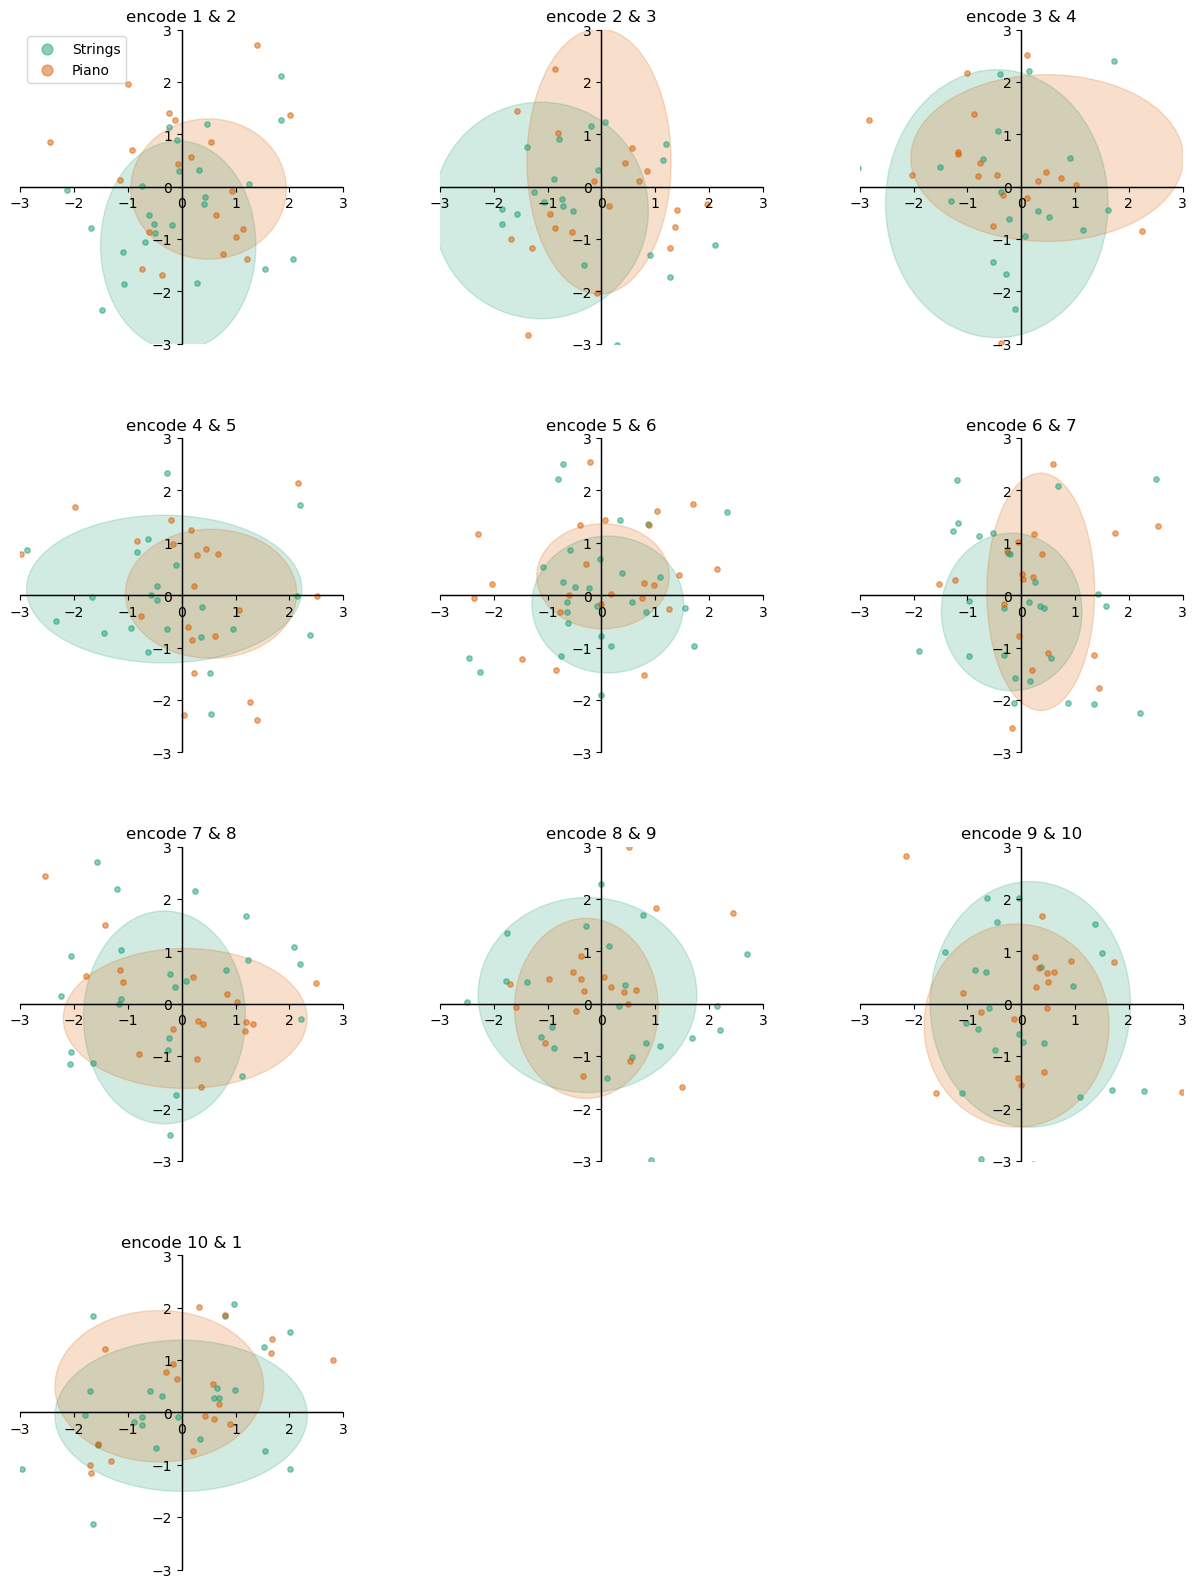

Encoded samples:
  29 x Pad
  49 x Plucked


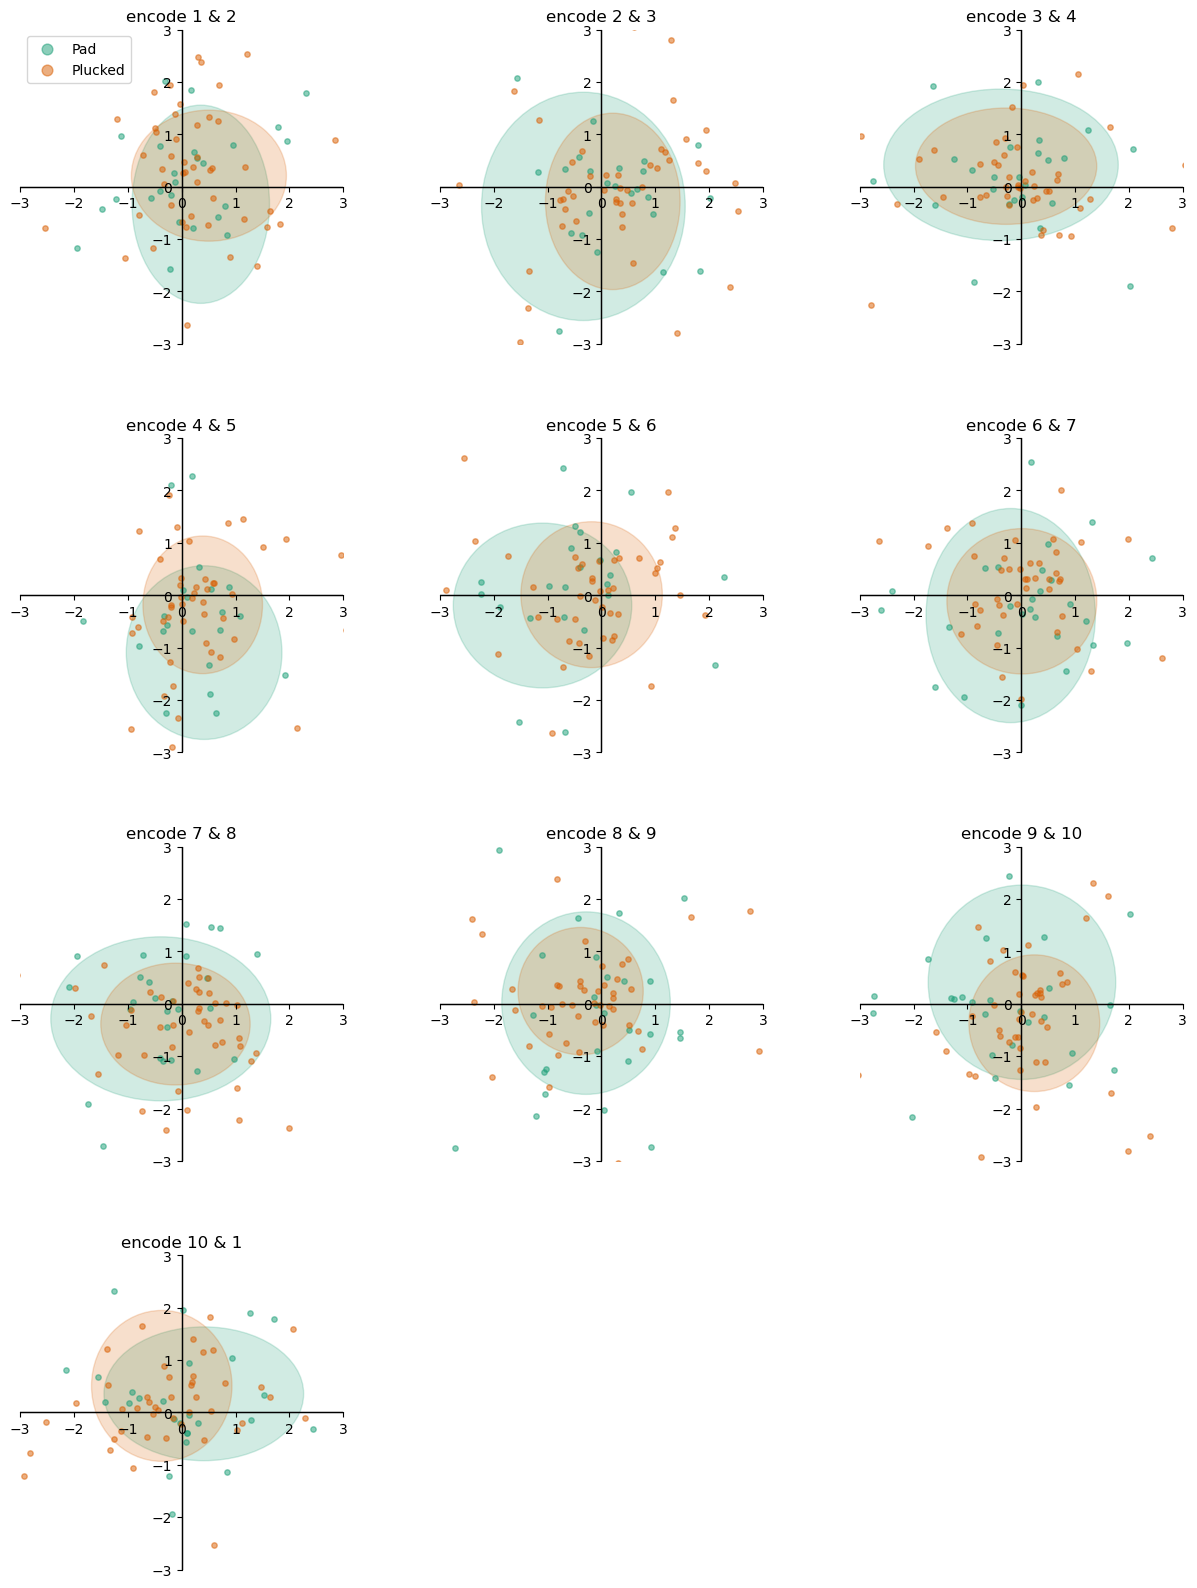

Encoded samples:
 231 x Vocal
 127 x Guitar


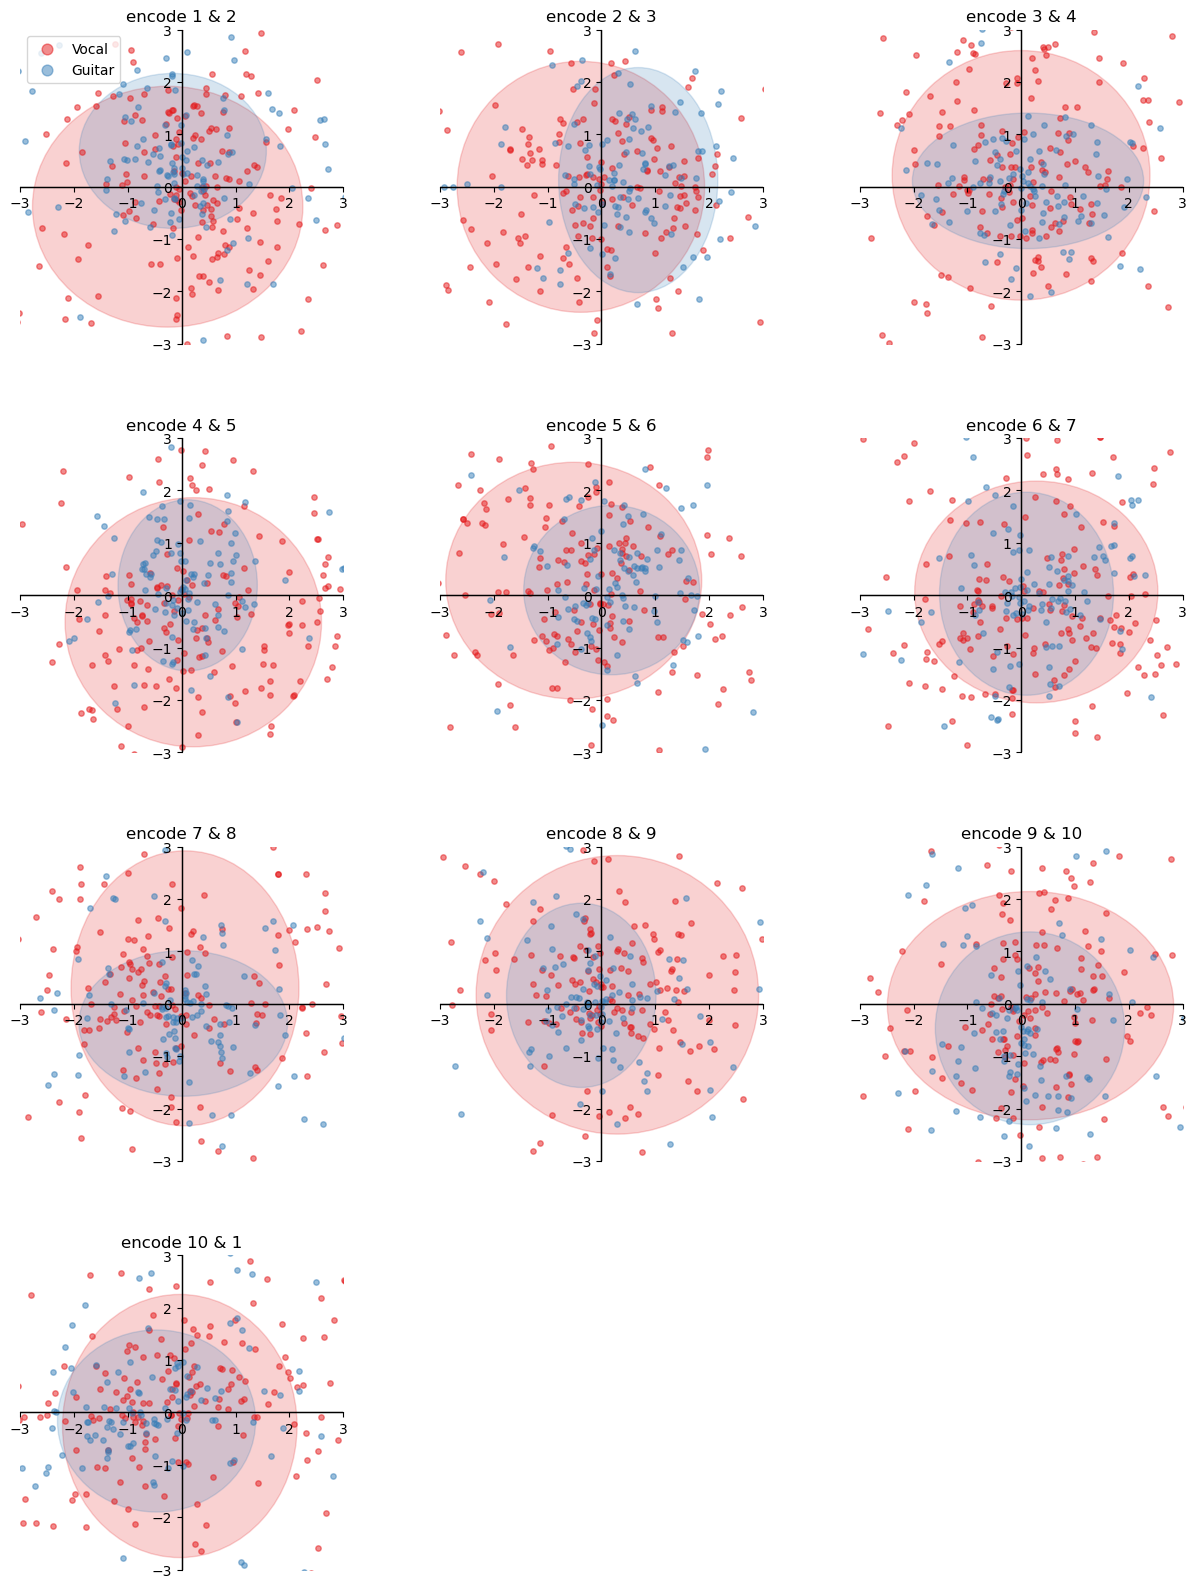

Encoded samples:
 231 x Vocal
  23 x Piano
 127 x Guitar


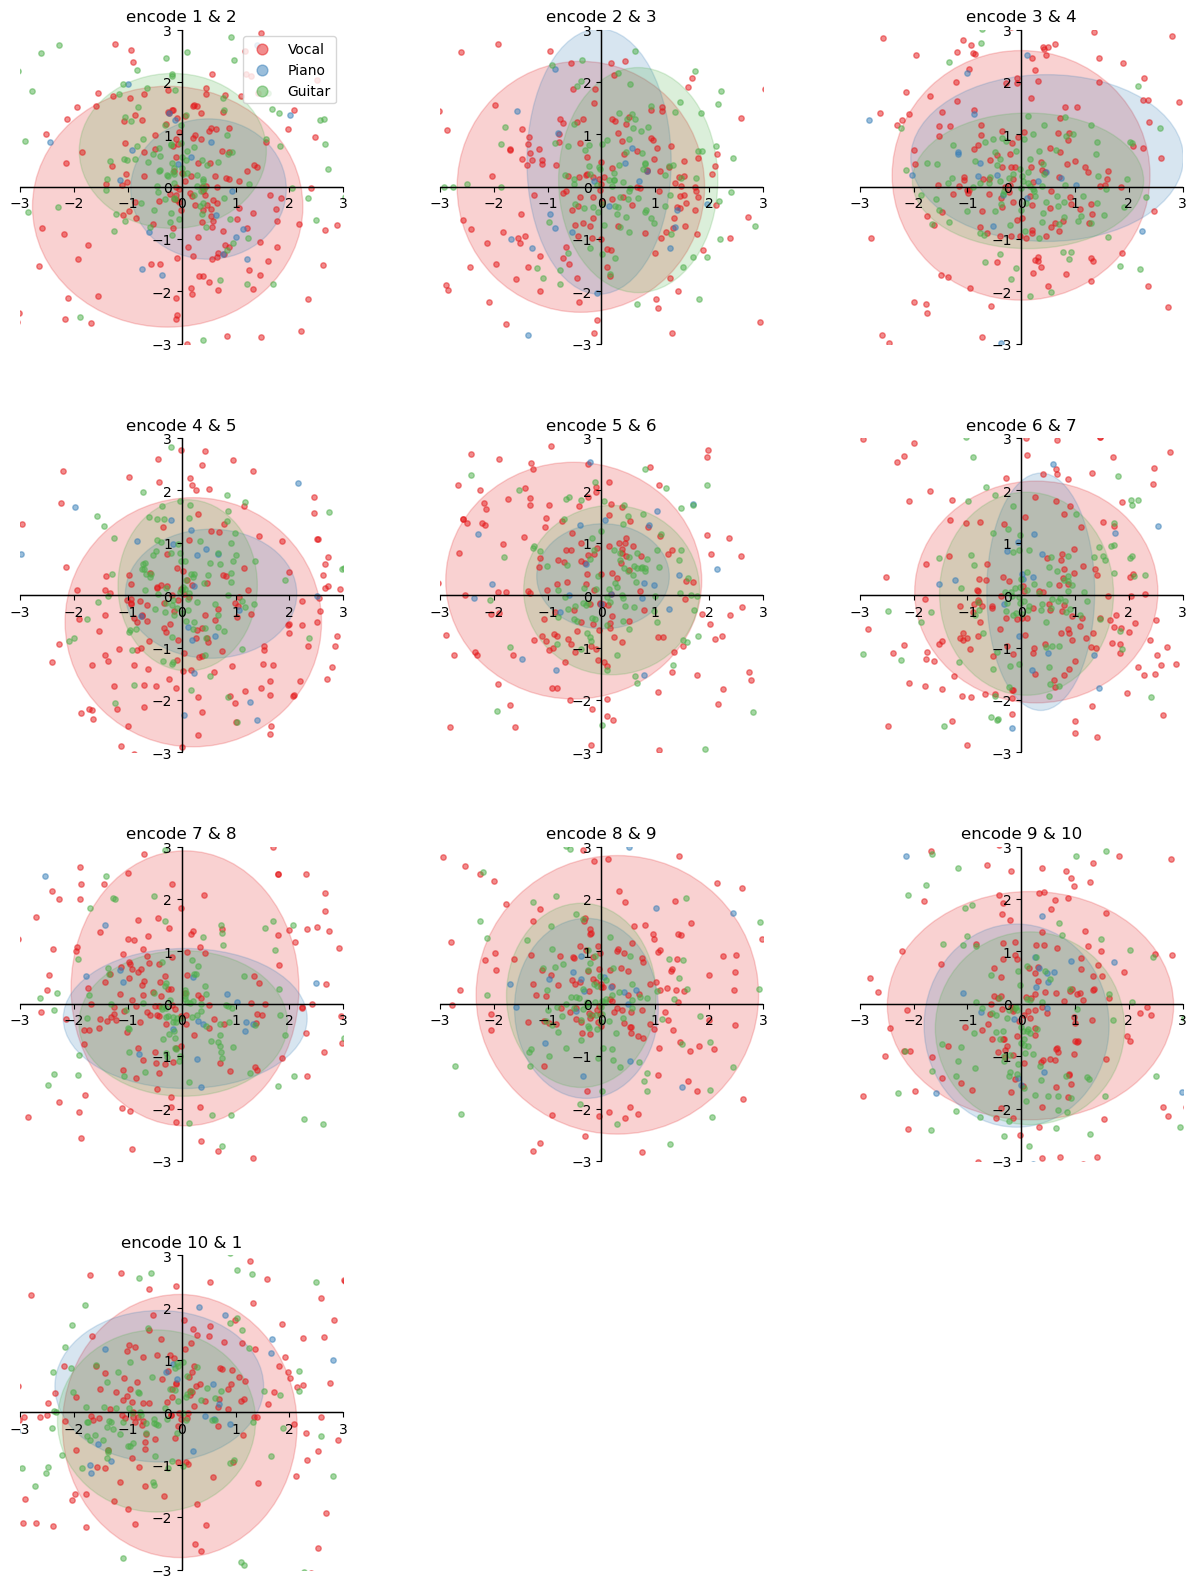

Encoded samples:
  31 x Bell
  23 x Piano
 127 x Guitar


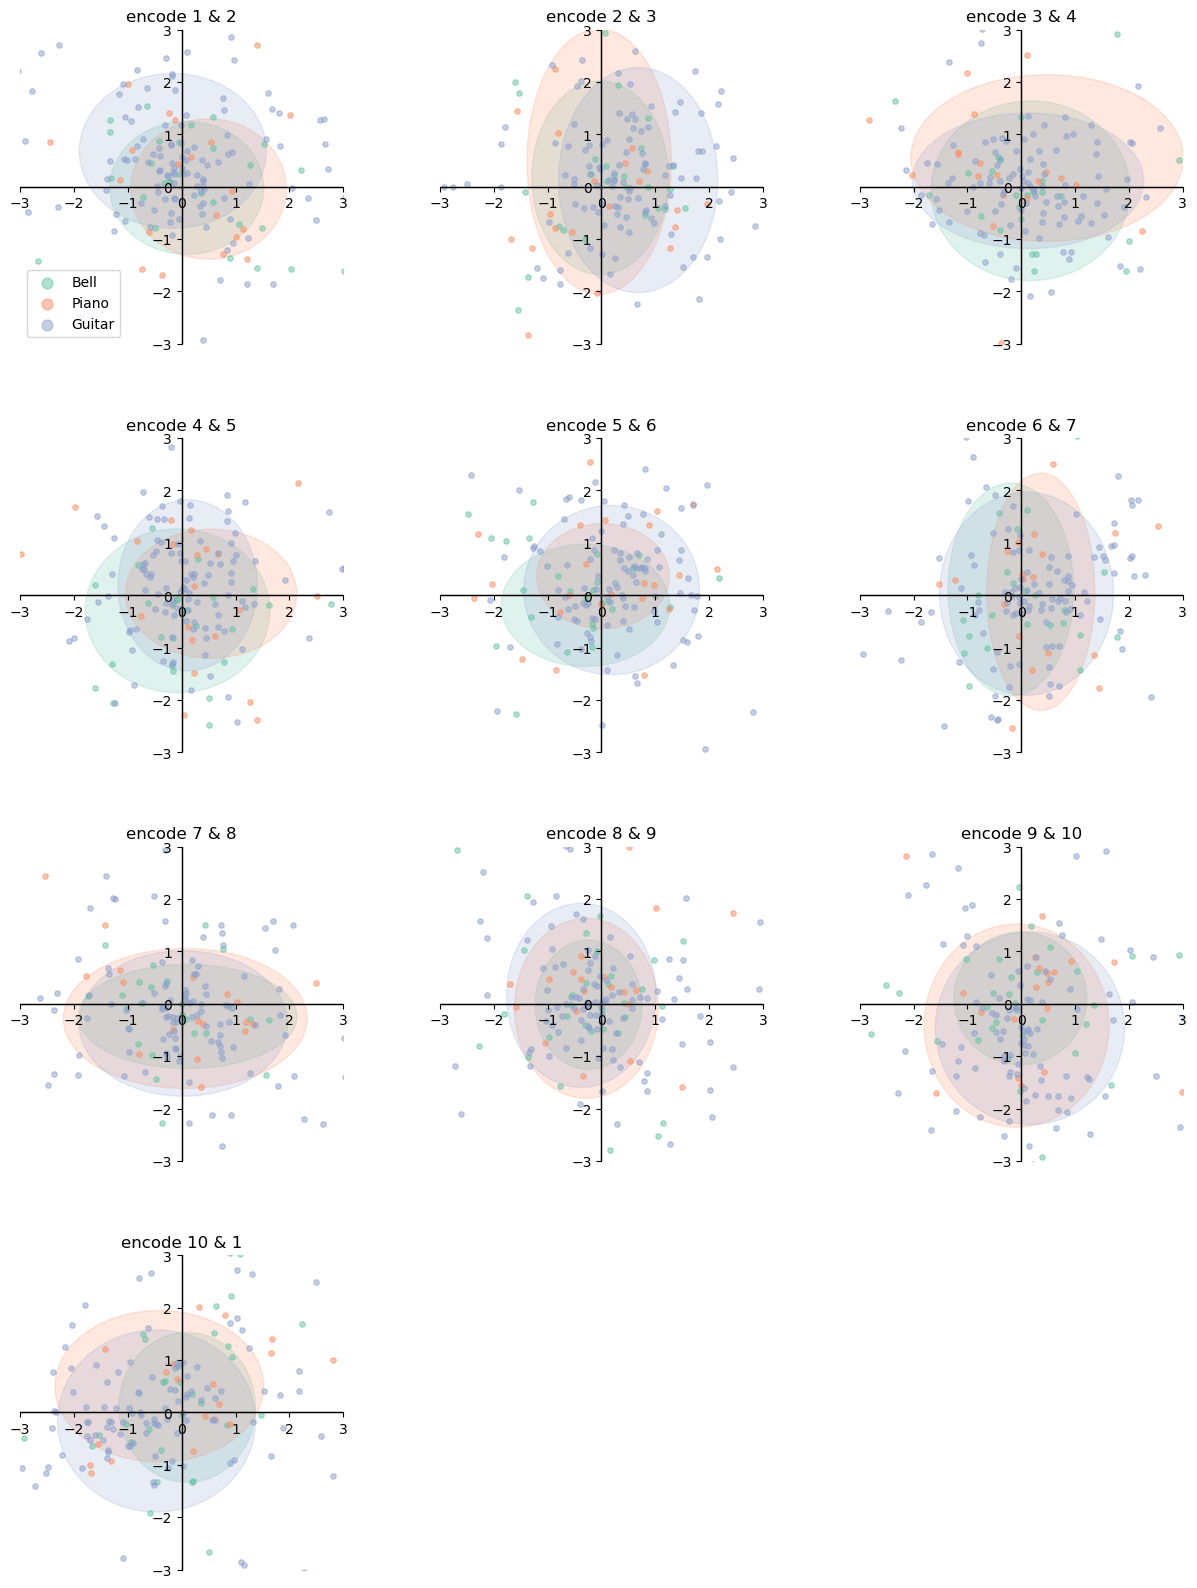

Encoded samples:
 119 x No Category
  62 x Synth Makes
  23 x Piano
  31 x Bell


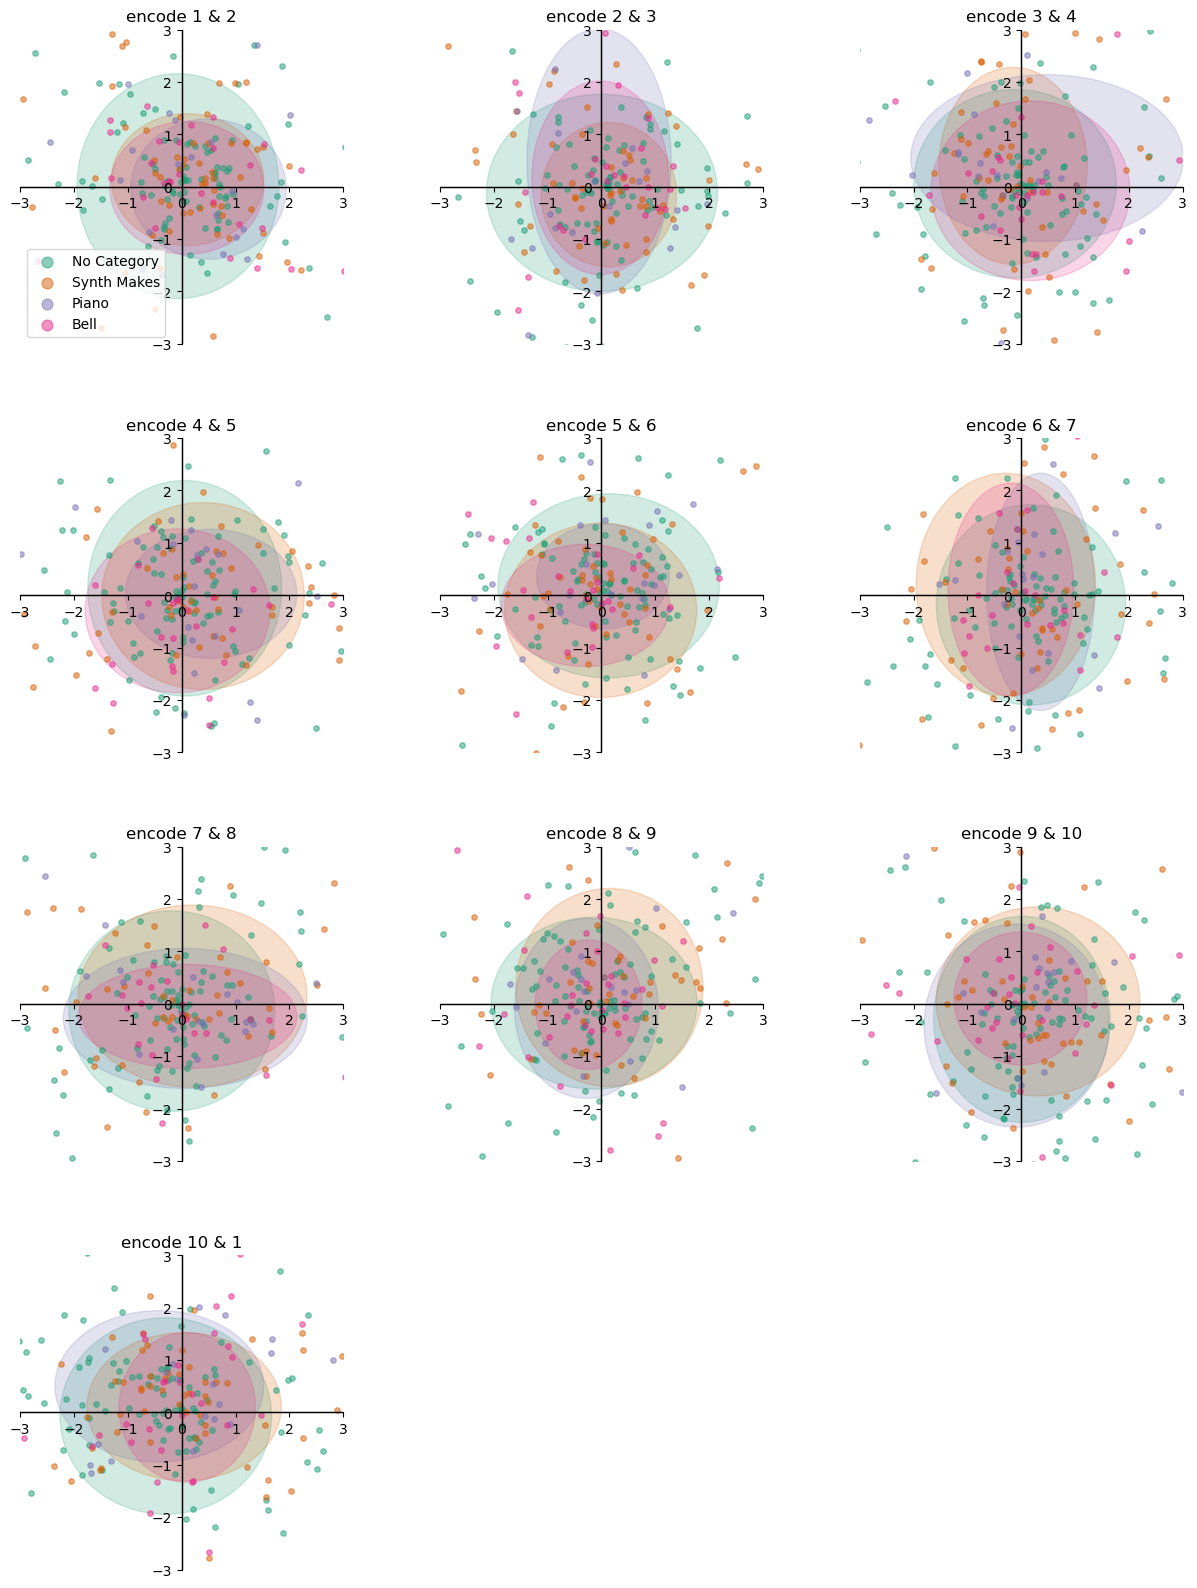

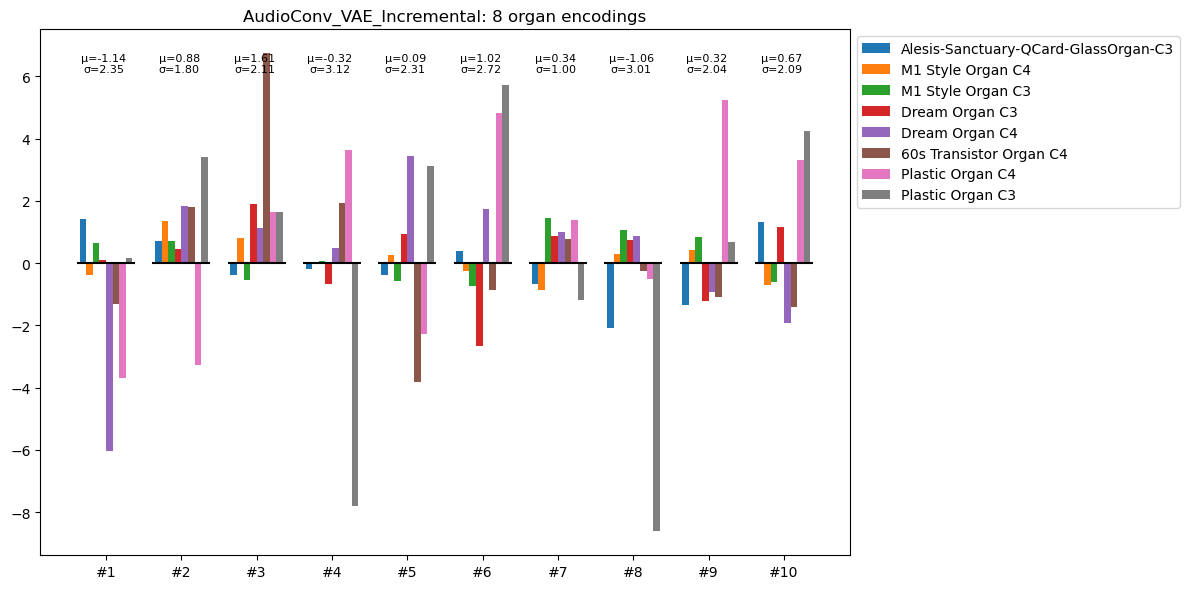

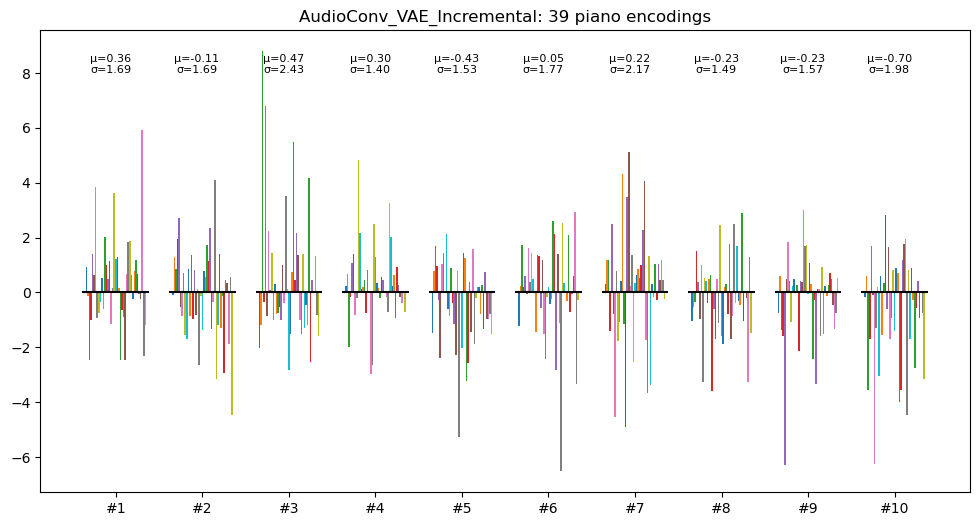

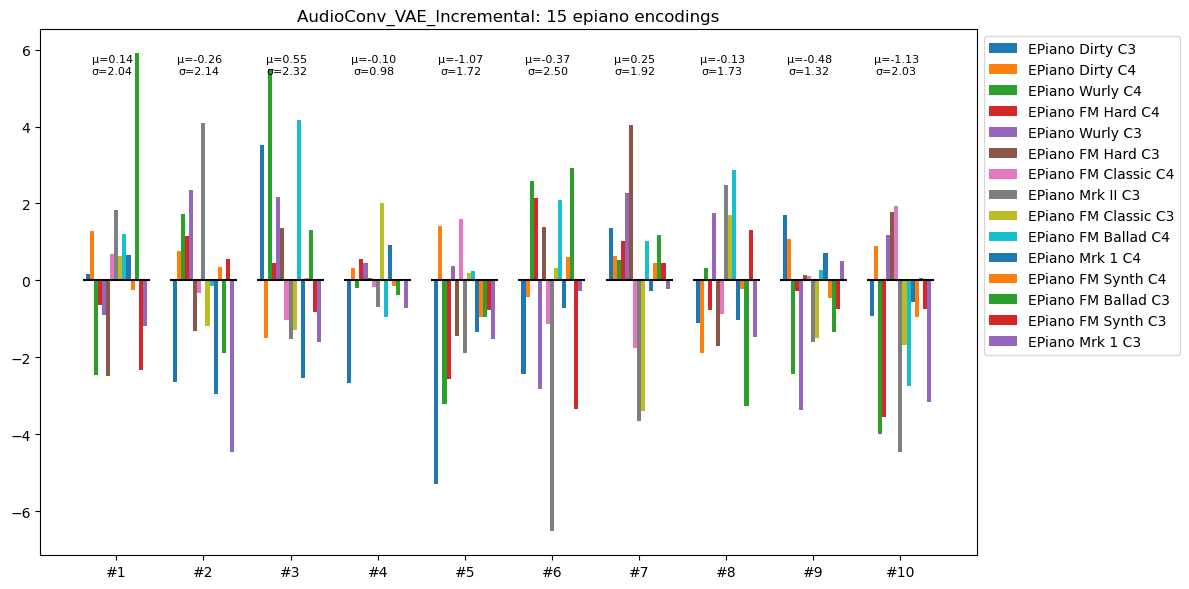

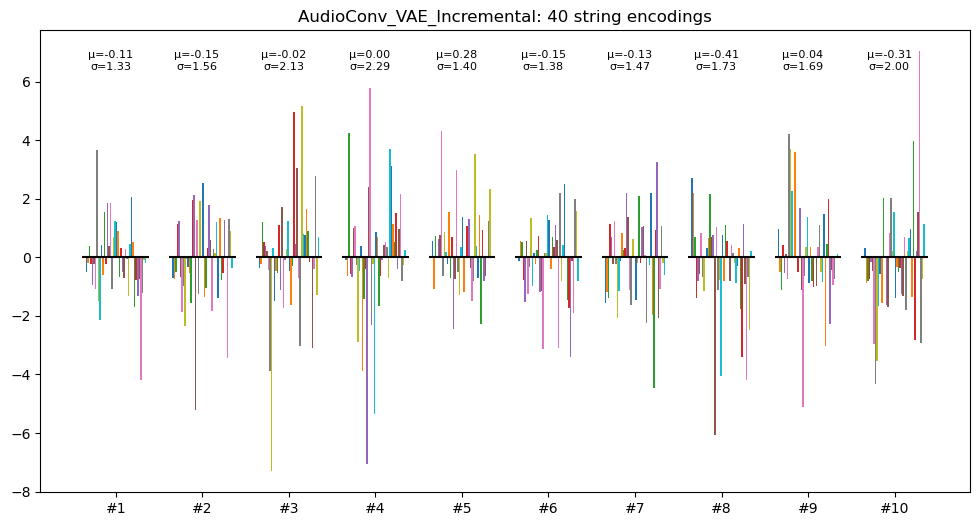

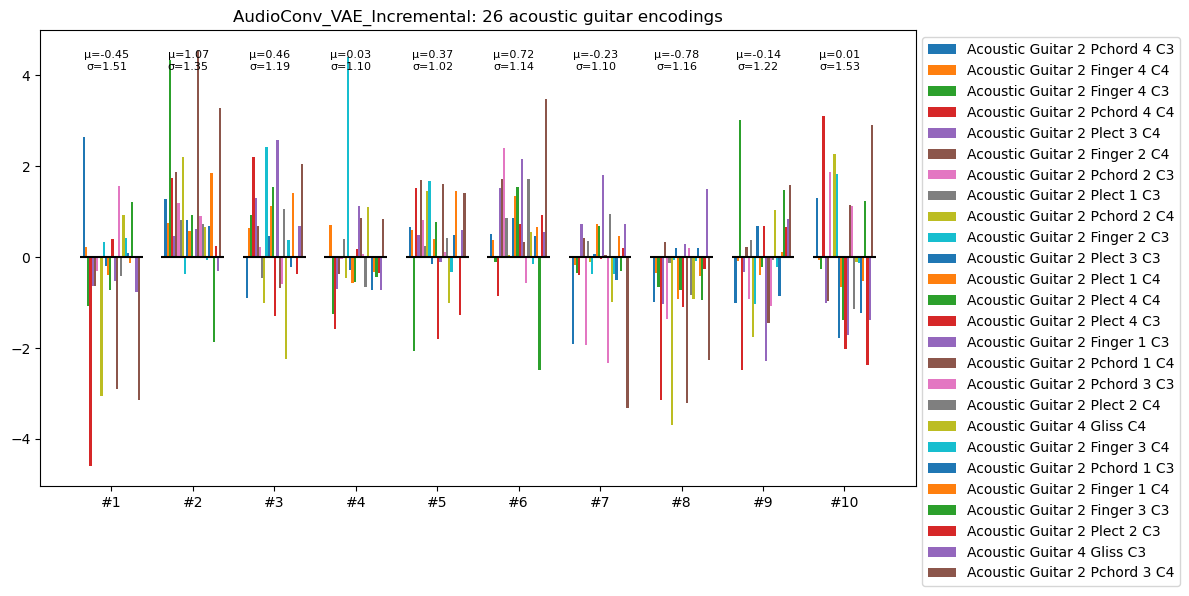

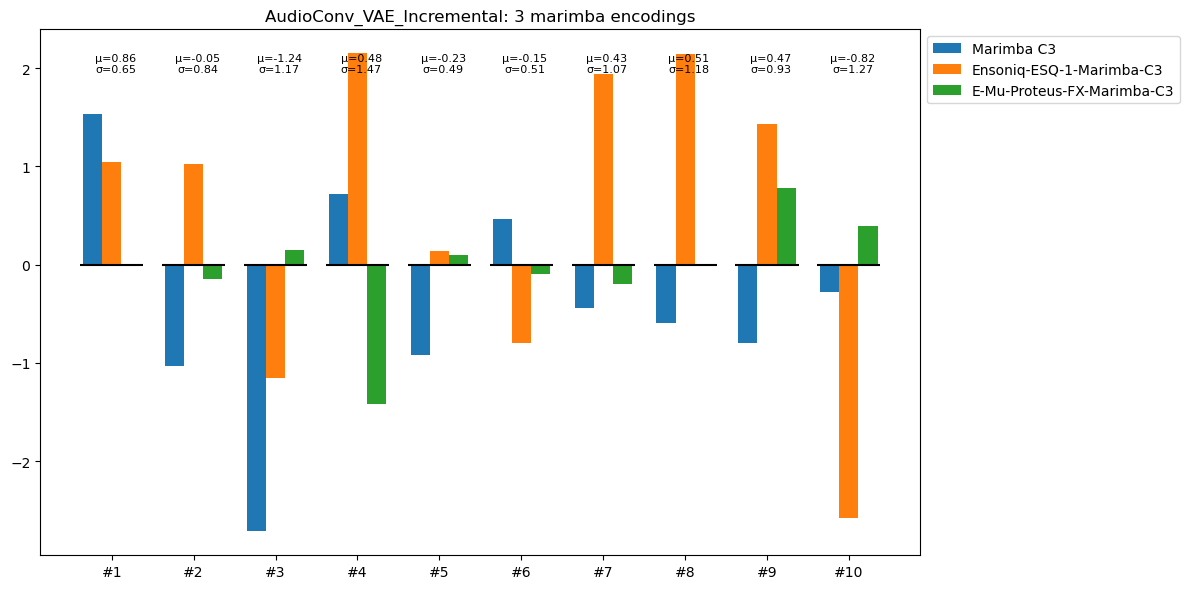

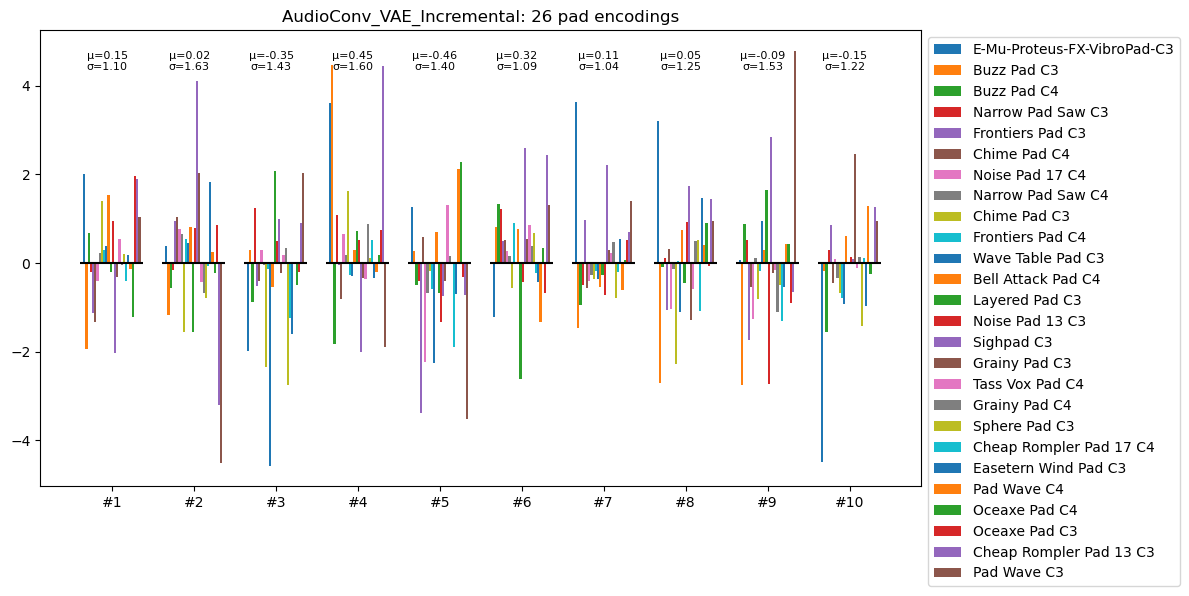

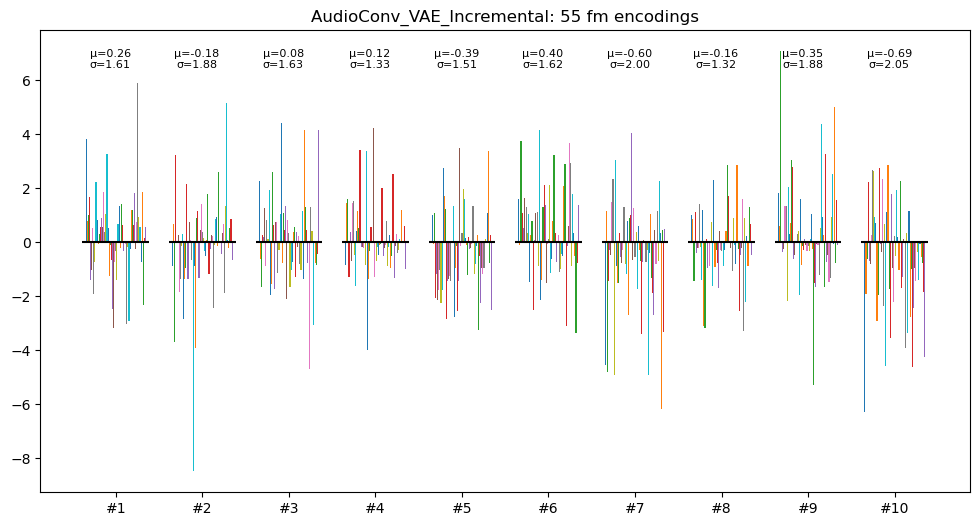

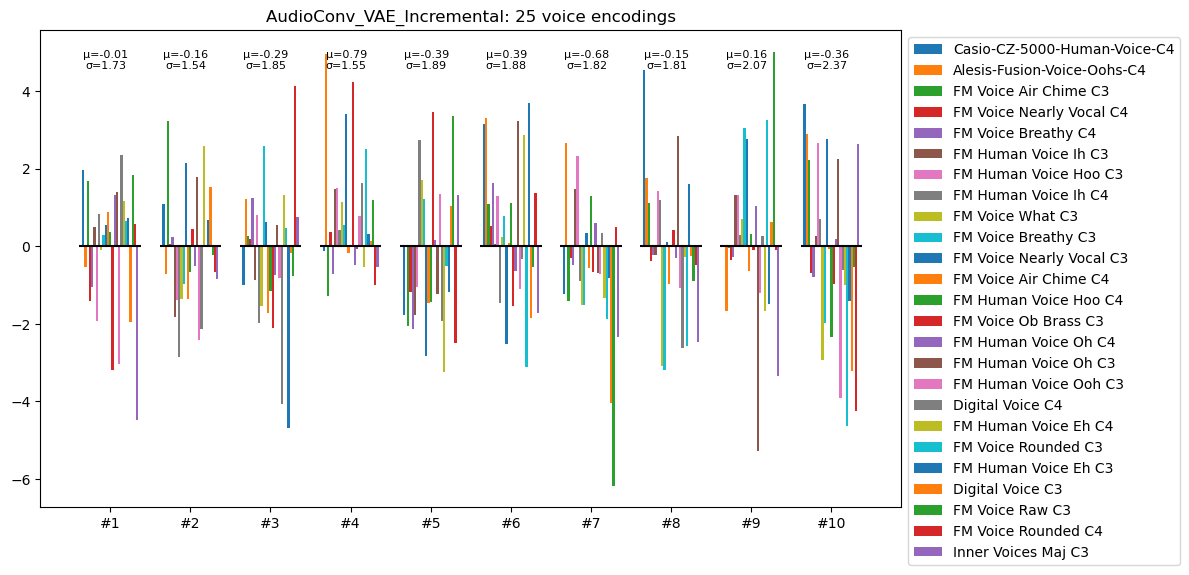

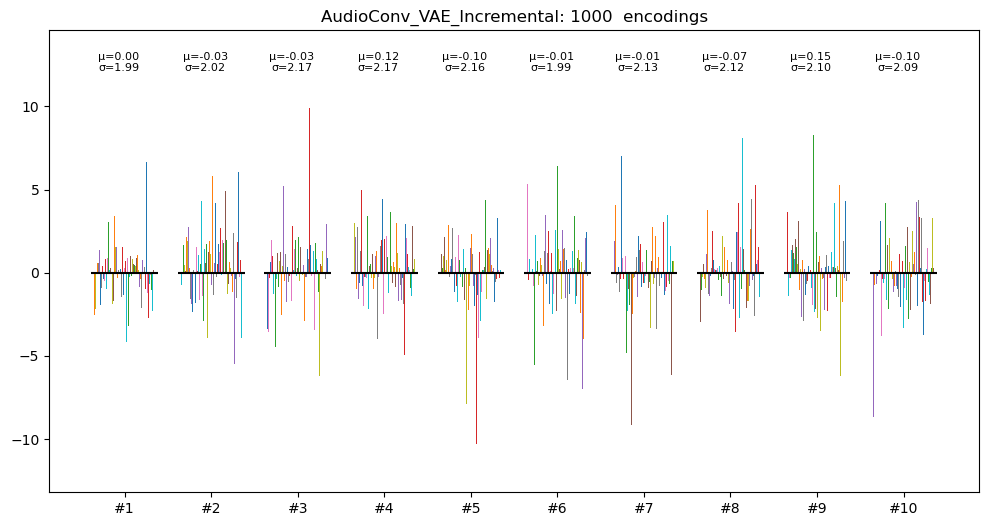

weight=tensor([10.0000,  6.4588,  4.3109,  ...,  1.0000,  1.0000,  1.0000],
       device='mps:0'), length=88200, weights=tensor([10.0000,  6.4588,  4.3109,  ...,  1.0000,  1.0000,  1.0000],
       device='mps:0')
weights = Torch.Tensor[88200] x torch.float32, size=88,200 elements = 352,800 bytes, device=mps:0


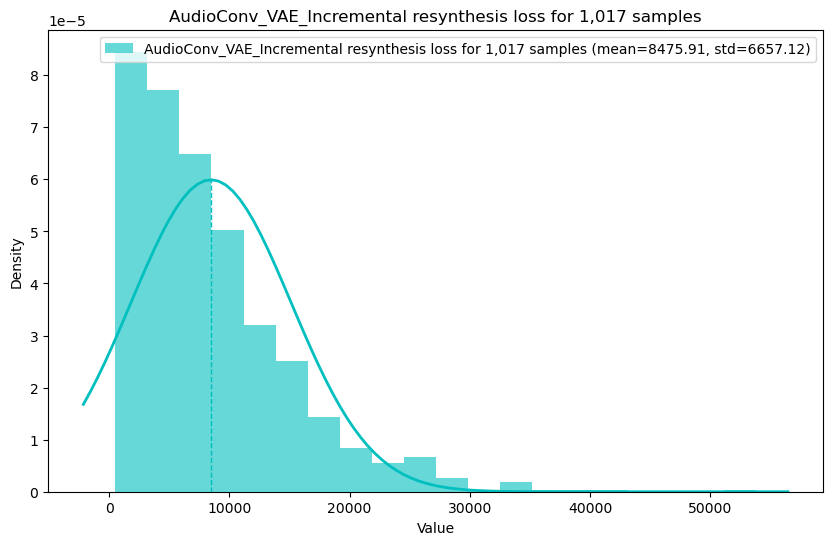

/Users/Richard/Coding/SampleGen/AudioUtils.py:75: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)
/Users/Richard/Coding/SampleGen/AudioUtils.py:75: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(file_name)


KeyboardInterrupt: 

In [5]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Print some pretty pictures of the samples and their encodings
demo_encodings()

# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Generate samples, interpolate, morph etc.
demo_sounds()


